In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv("data/city_data.csv")
ridedata = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combineddata = pd.merge(ridedata, citydata, on='city', how='left')
combineddata.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

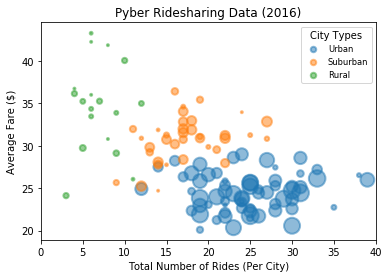

<Figure size 432x288 with 0 Axes>

In [3]:
# Obtain the x and y coordinates for each of the three city types
#Seperate Urban, Suburban and Rural
#urbancity = combineddata[combineddata["type"] == "Urban"]
urbancity=combineddata[combineddata["type"]=="Urban"]
suburbancity=combineddata[combineddata["type"]=="Suburban"]
ruralcity=combineddata[combineddata["type"]=="Rural"]

urbantotal = urbancity.groupby(["city"]).count()["ride_id"]
urbanfare = urbancity.groupby(["city"]).mean()["fare"]
urbandrive = urbancity.groupby(["city"]).mean()["driver_count"]

suburbantotal = suburbancity.groupby(["city"]).count()["ride_id"]
suburbanfare = suburbancity.groupby(["city"]).mean()["fare"]
suburbandrive = suburbancity.groupby(["city"]).mean()["driver_count"]

ruraltotal= ruralcity.groupby(["city"]).count()["ride_id"]
ruralfare = ruralcity.groupby(["city"]).mean()["fare"]
ruraldrive = ruralcity.groupby(["city"]).mean()["driver_count"]
ruralfare.head()

plt.scatter(urbantotal, urbanfare, label = "Urban", marker='o', alpha= .5, edgecolors= "face", linewidths=2,
           s=urbandrive*4)

plt.scatter(suburbantotal, suburbanfare, label = "Suburban", marker='o', alpha= .5, edgecolors= "face", linewidths=2,
           s=suburbandrive*4)

plt.scatter(ruraltotal, ruralfare, label = "Rural", marker='o', alpha= .5, edgecolors= "face", linewidths=2,
           s=ruraldrive*4)

plt.xlim(0,40)
#plt.ylim(15,45)
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5, frameon=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

#show plot
plt.tight_layout()
plt.savefig("../Images/scatterplot.png")
plt.show()

## Total Fares by City Type

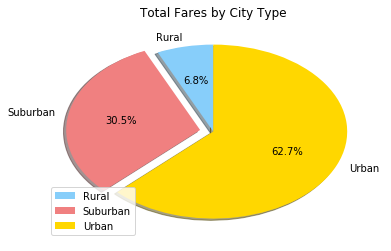

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Type Percents
typefare = pd.DataFrame(combineddata.groupby("type")["fare"].sum()).reset_index()
typefare

labels = ['Rural', 'Suburban','Urban']
#based on the math to find fare. the math is type & fare / the entire fare for 3
wedge_sizes = [typefare['fare'][0]/typefare['fare'].sum(),\
               typefare['fare'][1]/typefare['fare'].sum(),\
               typefare['fare'][2]/typefare['fare'].sum()]

colors = ['lightskyblue', 'lightcoral', 'gold']
#colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0, 0.1, 0)

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.1f%%', startangle=90,\
        colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Fares by City Type")
plt.show()

# Save Figure
plt.tight_layout()
plt.savefig("../Images/farebycity.png")
plt.show()

## Total Rides by City Type

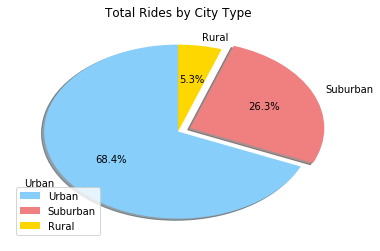

<Figure size 432x288 with 0 Axes>

In [10]:
# Calculate Ride Percents
#Total Rides by City Type
tots = len(combineddata.groupby(["ride_id"]).count())
tots
#Urban
urbantotals = len(urbancity.groupby(["ride_id"]).count())
urbantotals

urbanpercent = urbantotals / tots * 100
urbanpercent

#suburban math
suburbantotals = len(suburbancity.groupby(["ride_id"]).count())
suburbantotals
subtots = suburbantotals / tots * 100
subtots

#Ruralmath
ruraltotals = len(ruralcity.groupby(["ride_id"]).count())
ruralpercent= ruraltotals / tots * 100
ruralpercent

labels = ['Urban', 'Suburban','Rural']
wedge_sizes = [urbanpercent ,\
               subtots,\
               ruralpercent]
explode = (0, 0.1, 0)

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.1f%%',\
        startangle=90, colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Rides by City Type")
plt.show()

# Save Figure
plt.tight_layout()
plt.savefig("../Images/ridebycity.png")

#show plot
plt.show()


## Total Drivers by City Type

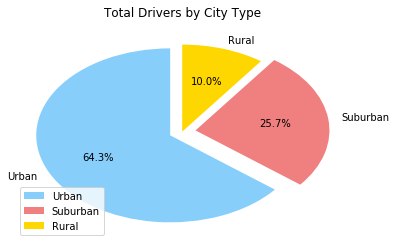

<Figure size 432x288 with 0 Axes>

In [11]:
# Calculate Driver Percents
#Total Drivers by City Type
totaling = len(combineddata.groupby(["driver_count"]).count())
totaling

urbscount =  len(urbancity.groupby(["driver_count"]).sum())
urbypercent = urbscount / totaling * 100
urbypercent

subscount = len(suburbancity.groupby(["driver_count"]).sum())
subpercent = subscount / totaling * 100
subpercent


ruralcount = len(ruralcity.groupby(["driver_count"]).sum())
ruralpercent = ruralcount / totaling * 100
ruralpercent

# Build Pie Charts
labels = ['Urban', 'Suburban','Rural']
wedge_sizes = [urbypercent,\
               subpercent,\
               ruralpercent]
explode = (0.1, 0.1, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Drivers by City Type")
plt.show()

# Save Figure
plt.tight_layout()
plt.savefig("../Images/totdrivecity.png")
plt.show()

In [ ]:
# 3 takeaways from the data set
#1. I would not invest in the rural areas. They are the lowest in every area and would not be a profitable as the other areas
#2. The Urban area is the winner in every area and most importantly the Fares which means it is most profitable.
#3. The Suburban area is profitable. I would put marketing dollars in the area to grow this particular market segment to see if
#it could grow on the urban area. The trips could be more profitable seeing that the trips would more than likely be longer trips.
#There are more drivers in the Urban area which leads to lots more competition amongst drivers. It might be a good investment to put a few more
#drivers in the suburbs to catch more trips.